# 第五回：样式色彩秀芳华

第五回详细介绍matplotlib中样式和颜色的使用，绘图样式和颜色是丰富可视化图表的重要手段，因此熟练掌握本章可以让可视化图表变得更美观，突出重点和凸显艺术性。  
关于绘图样式，常见的有4种方法，分别是修改预定义样式，自定义样式，rcparams和matplotlibrc文件。  
关于颜色使用，本章介绍了常见的5种表示单色颜色的基本方法，以及colormap多色显示的方法。

## 一、matplotlib的绘图样式（style）

在matplotlib中，要想设置绘制样式，最简单的方法是在绘制元素时单独设置样式。
但是有时候，当用户在做专题报告时，往往会希望保持整体风格的统一而不用对每张图一张张修改，因此matplotlib库还提供了四种批量修改全局样式的方式

### 1.matplotlib预先定义样式

matplotlib贴心地提供了许多内置的样式供用户使用，使用方法很简单，只需在python脚本的最开始输入想使用style的名称即可调用，尝试调用不同内置样式，比较区别

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

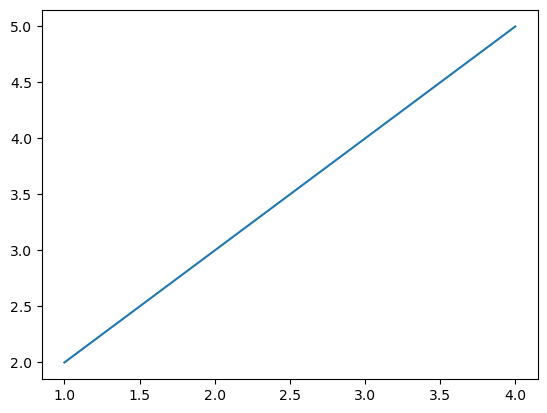

In [2]:
plt.style.use('default')
plt.plot([1,2,3,4],[2,3,4,5])

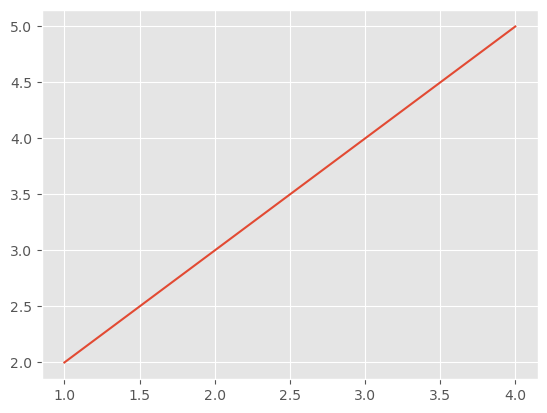

In [3]:
plt.style.use('ggplot')
plt.plot([1,2,3,4],[2,3,4,5])

那么matplotlib究竟内置了那些样式供使用呢？总共以下26种丰富的样式可供选择。

In [4]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


### 2.用户自定义stylesheet

在任意路径下创建一个后缀名为mplstyle的样式清单，编辑文件添加以下样式内容  

> axes.titlesize : 24     
axes.labelsize : 20   
lines.linewidth : 3   
lines.markersize : 10   
xtick.labelsize : 16   
ytick.labelsize : 16  

引用自定义stylesheet后观察图表变化。

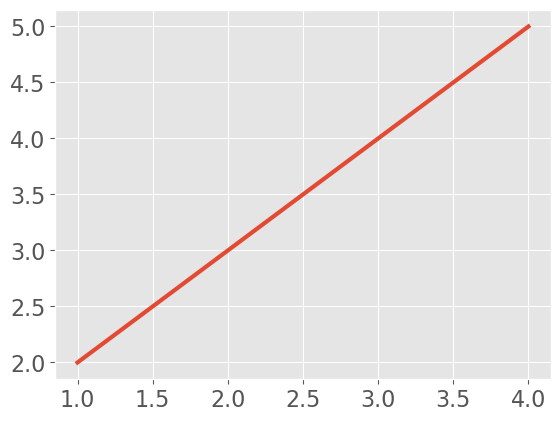

In [5]:
plt.style.use('../file/presentation.mplstyle')
plt.plot([1,2,3,4],[2,3,4,5])

值得特别注意的是，matplotlib支持混合样式的引用，只需在引用时输入一个样式列表，若是几个样式中涉及到同一个参数，右边的样式表会覆盖左边的值。

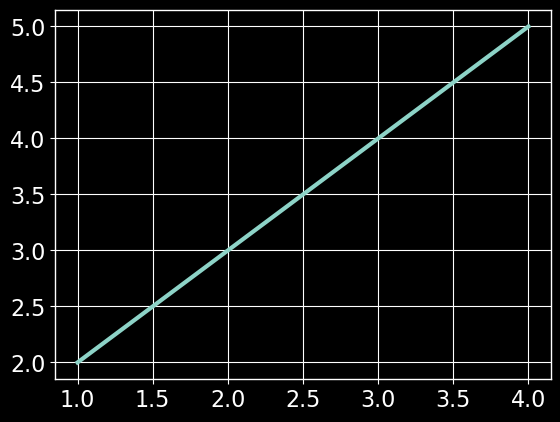

In [6]:
plt.style.use(['dark_background', '../file/presentation.mplstyle'])
plt.plot([1,2,3,4],[2,3,4,5])

### 3.设置rcparams

我们还可以通过修改默认rc设置的方式改变样式，所有rc设置都保存在一个叫做 matplotlib.rcParams的变量中。  
修改过后再绘图，可以看到绘图样式发生了变化。

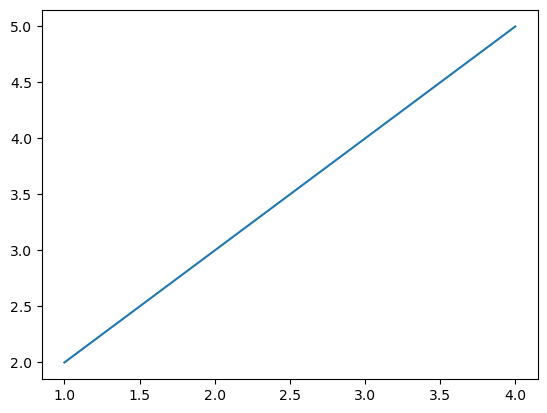

In [7]:
plt.style.use('default') # 恢复到默认样式
plt.plot([1,2,3,4],[2,3,4,5])

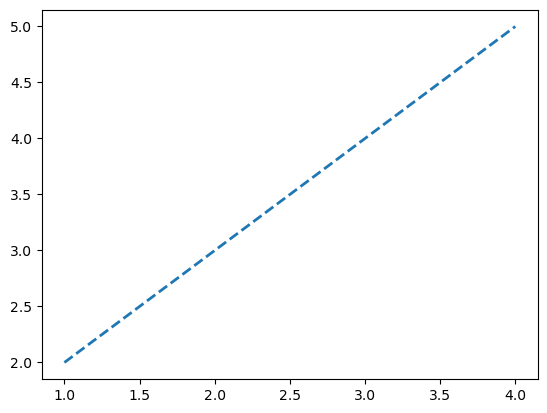

In [8]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '--'
plt.plot([1,2,3,4],[2,3,4,5])

另外matplotlib也还提供了了一种更便捷的修改样式方式，可以一次性修改多个样式。

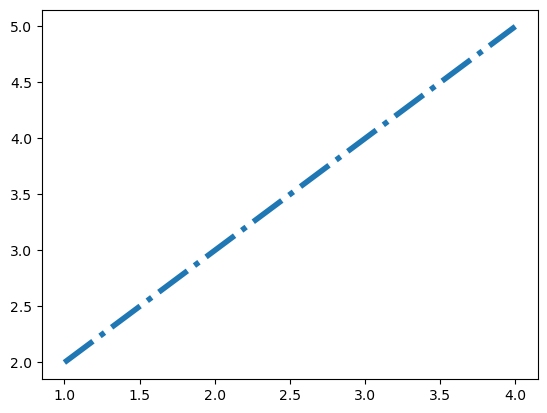

In [9]:
mpl.rc('lines', linewidth=4, linestyle='-.')
plt.plot([1,2,3,4],[2,3,4,5])

### 4.修改matplotlibrc文件

由于matplotlib是使用matplotlibrc文件来控制样式的，也就是上一节提到的rc setting，所以我们还可以通过修改matplotlibrc文件的方式改变样式。

In [10]:
# 查找matplotlibrc文件的路径
mpl.matplotlib_fname()

'E:\\LearningDisk\\Learning_Projects\\MyPythonProjects\\my-team-learning\\venv\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

找到路径后，就可以直接编辑样式文件了，打开后看到的文件格式大致是这样的，文件中列举了所有的样式参数，找到想要修改的参数，比如lines.linewidth: 8，并将前面的注释符号去掉，此时再绘图发现样式以及生效了。

![](https://img-blog.csdnimg.cn/20201124005855980.PNG)

## 二、matplotlib的色彩设置（color）

在可视化中，如何选择合适的颜色和搭配组合也是需要仔细考虑的，色彩选择要能够反映出可视化图像的主旨。  
从可视化编码的角度对颜色进行分析，可以将颜色分为`色相、亮度和饱和度`三个视觉通道。通常来说：  
`色相`： 没有明显的顺序性、一般不用来表达数据量的高低，而是用来表达数据列的类别。  
`明度和饱和度`： 在视觉上很容易区分出优先级的高低、被用作表达顺序或者表达数据量视觉通道。  
具体关于色彩理论部分的知识，不属于本教程的重点，请参阅有关拓展材料学习。  
[ECharts数据可视化实验室](https://vis.baidu.com/chartcolor/basis/)  
[学会这6个可视化配色基本技巧，还原数据本身的意义](https://zhuanlan.zhihu.com/p/88892542)

在matplotlib中，设置颜色有以下几种方式：

### 1.RGB或RGBA

In [11]:
plt.style.use('default')

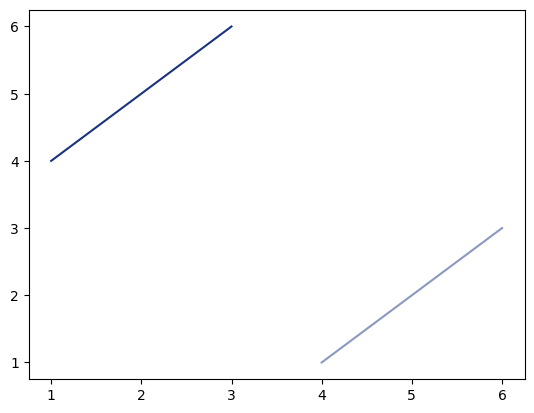

In [12]:
# 颜色用[0,1]之间的浮点数表示，四个分量按顺序分别为(red, green, blue, alpha)，其中alpha透明度可省略
plt.plot([1,2,3],[4,5,6],color=(0.1, 0.2, 0.5))
plt.plot([4,5,6],[1,2,3],color=(0.1, 0.2, 0.5, 0.5))

### 2.HEX RGB 或 RGBA 

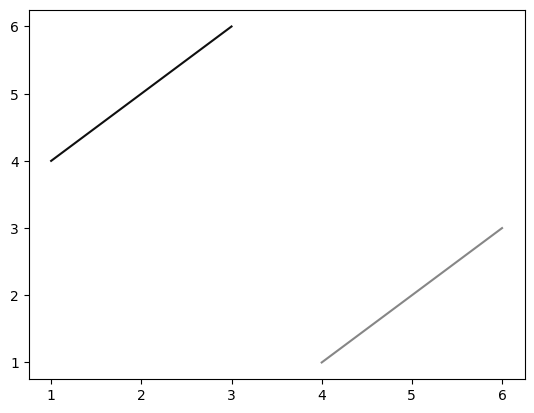

In [13]:
# 用十六进制颜色码表示，同样最后两位表示透明度，可省略
plt.plot([1,2,3],[4,5,6],color='#0f0f0f')
plt.plot([4,5,6],[1,2,3],color='#0f0f0f80')

RGB颜色和HEX颜色之间是可以一一对应的，以下网址提供了两种色彩表示方法的转换工具。  
[https://www.colorhexa.com/](https://www.colorhexa.com/)

### 3.灰度色阶

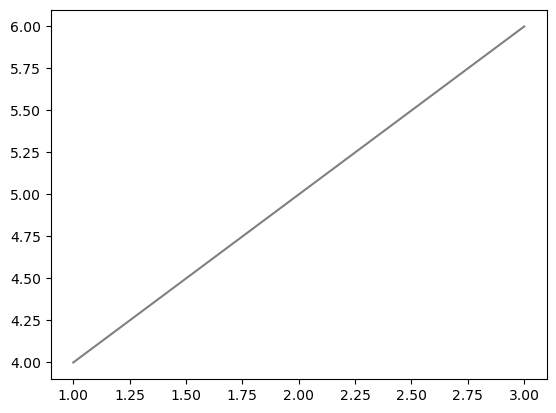

In [14]:
# 当只有一个位于[0,1]的值时，表示灰度色阶
plt.plot([1,2,3],[4,5,6],color='0.5')

### 4.单字符基本颜色

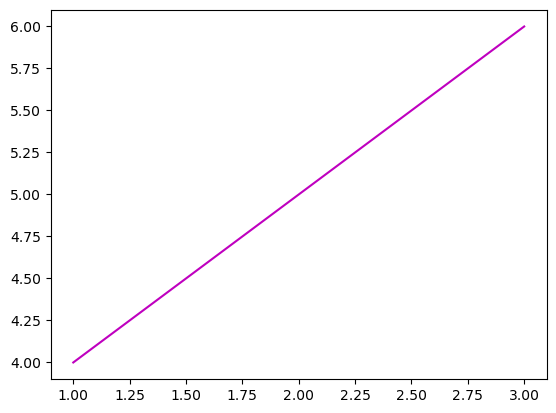

In [15]:
# matplotlib有八个基本颜色，可以用单字符串来表示，分别是'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'，对应的是blue, green, red, cyan, magenta, yellow, black, and white的英文缩写
plt.plot([1,2,3],[4,5,6],color='m')

### 5.颜色名称

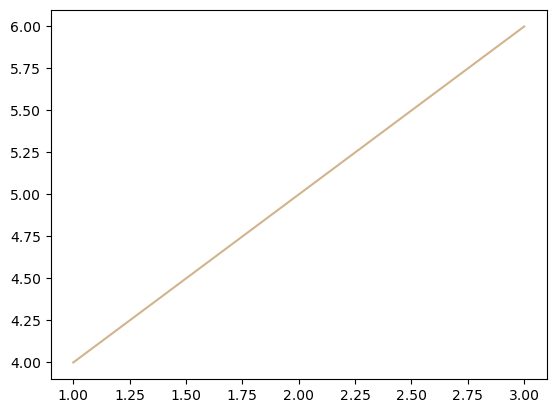

In [16]:
# matplotlib提供了颜色对照表，可供查询颜色对应的名称
plt.plot([1,2,3],[4,5,6],color='tan')

![](https://matplotlib.org/3.1.0/_images/sphx_glr_named_colors_002.png)
![](https://matplotlib.org/3.1.0/_images/sphx_glr_named_colors_003.png)

### 6.使用colormap设置一组颜色

有些图表支持使用colormap的方式配置一组颜色，从而在可视化中通过色彩的变化表达更多信息。

在matplotlib中，colormap共有五种类型:

- 顺序（Sequential）。通常使用单一色调，逐渐改变亮度和颜色渐渐增加，用于表示有顺序的信息
- 发散（Diverging）。改变两种不同颜色的亮度和饱和度，这些颜色在中间以不饱和的颜色相遇；当绘制的信息具有关键中间值（例如地形）或数据偏离零时，应使用此值。
- 循环（Cyclic）。改变两种不同颜色的亮度，在中间和开始/结束时以不饱和的颜色相遇。用于在端点处环绕的值，例如相角，风向或一天中的时间。
- 定性（Qualitative）。常是杂色，用来表示没有排序或关系的信息。
- 杂色（Miscellaneous）。一些在特定场景使用的杂色组合，如彩虹，海洋，地形等。

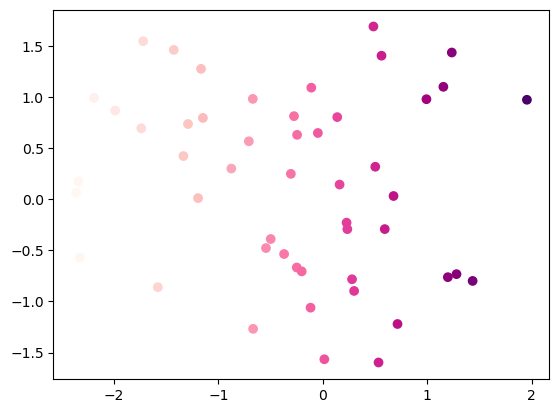

In [17]:
x = np.random.randn(50)
y = np.random.randn(50)
plt.scatter(x,y,c=x,cmap='RdPu')

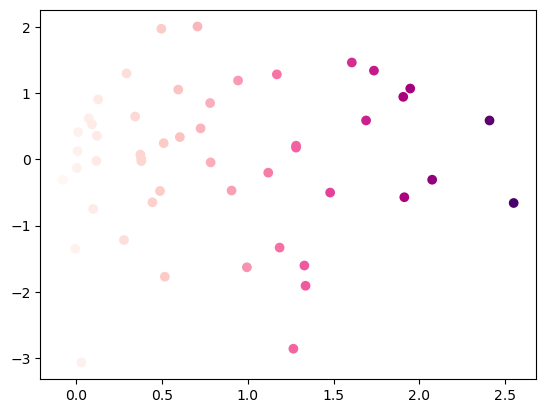

In [18]:
# 这里展示一个偏态数据的例子，生产数据常常是右偏居多，此时发现由于数据有明显偏斜，导致使用colormap时无法看出显示较好的区分度
from scipy.stats import skewnorm
x = skewnorm.rvs(20, size=50)
y = np.random.randn(50)
plt.scatter(x,y,c=x,cmap='RdPu')

E:\LearningDisk\Learning_Projects\MyPythonProjects\my-team-learning\venv\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


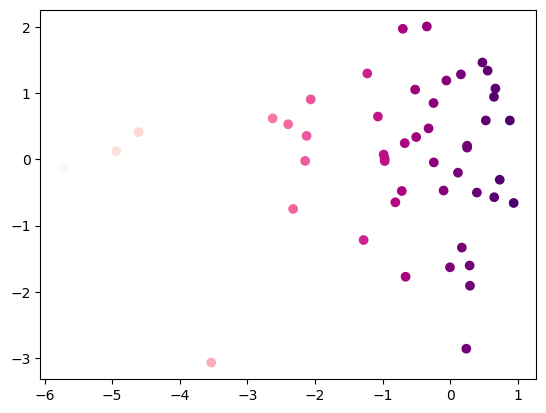

In [19]:
# 使用对数后再绘制散点图，得到了更好的色彩区分度
x_norm = np.log(x)
plt.scatter(x_norm,y,c=x_norm,cmap='RdPu')

在以下官网页面可以查询上述五种colormap的字符串表示和颜色图的对应关系    
[https://matplotlib.org/stable/tutorials/colors/colormaps.html](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

## 作业


1）查阅matplotlib官网，列举出Sequential，Diverging，Cyclic，Qualitative，Miscellaneous分别有哪些内置的colormap，并以`代码绘图`的形式展现出来

2）学习如何自定义colormap，并将其应用到任意一个数据集中，绘制一幅图像，注意colormap的类型要和数据集的特性相匹配，并做简单解释